<a href="https://colab.research.google.com/github/SAISRIJA-68/OIBSIP/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of Dataset: (891, 15)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Summary Statistics:

         survived      pclass         

/tmp/ipython-input-1564901925.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1564901925.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

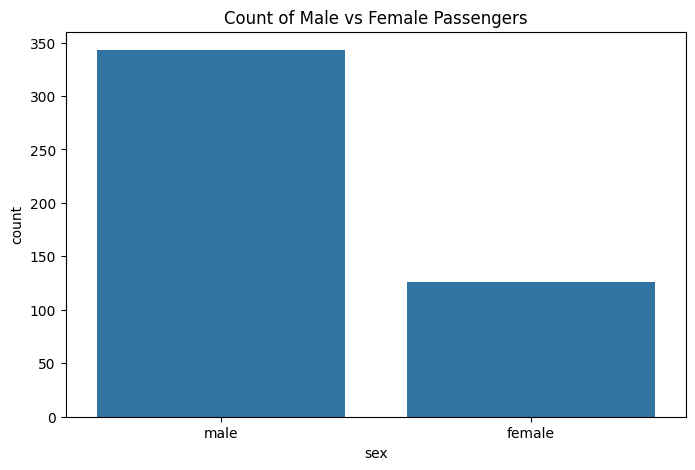

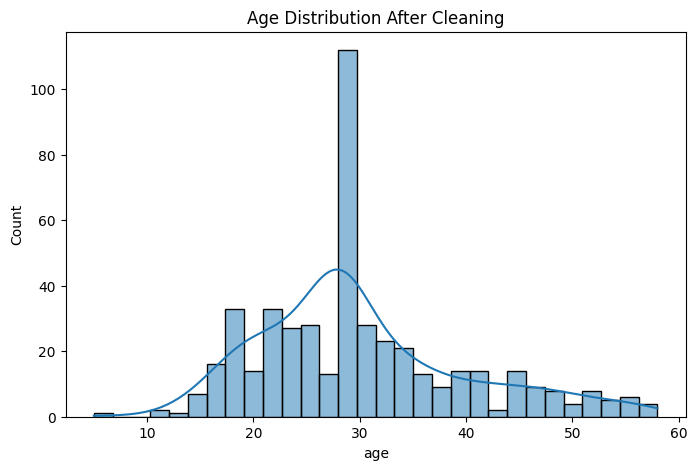


✅ Data Cleaning Completed! Cleaned file saved as 'cleaned_data.csv'


In [3]:
# ------------------------------------------
# 🧹 Data Cleaning Project
# ------------------------------------------

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# 📥 Load the Dataset
# ------------------------------------------
# You can replace these links with your dataset URLs or upload CSVs manually in Colab
# Example:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('your_dataset.csv')

# For demonstration, we will use a sample dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# ------------------------------------------
# 🔍 Initial Exploration
# ------------------------------------------
print("Shape of Dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# ------------------------------------------
# 🧠 Handling Missing Data
# ------------------------------------------
# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values (example: cabin)
df.drop(columns=['deck'], inplace=True, errors='ignore')

print("\nAfter Handling Missing Values:\n")
print(df.isnull().sum())

# ------------------------------------------
# 📑 Removing Duplicates
# ------------------------------------------
print("\nDuplicates before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after cleaning:", df.duplicated().sum())

# ------------------------------------------
# 🔤 Standardization
# ------------------------------------------
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Example: Convert categorical text to title case
df['embarked'] = df['embarked'].str.title()

# ------------------------------------------
# 🚨 Outlier Detection and Handling
# ------------------------------------------
# Using IQR method
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

print("\nAfter Outlier Removal, Shape:", df.shape)

# ------------------------------------------
# 📊 Visualization of Clean Data
# ------------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df)
plt.title('Count of Male vs Female Passengers')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution After Cleaning')
plt.show()

# ------------------------------------------
# 💾 Save Cleaned Data
# ------------------------------------------
df.to_csv("cleaned_data.csv", index=False)
print("\n✅ Data Cleaning Completed! Cleaned file saved as 'cleaned_data.csv'")
